<a href="https://colab.research.google.com/github/MagalyCabrera8/TAM-2025-2/blob/main/VectoresMinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Construye un código de Python que muestre la proyección de un vector en 2 dimensiones sobre otro, incluyendo la solución analítica e iterativa (gradiente descendente). El código debe estar organizado en métodos principales, comparar los resultados de ambos métodos y visualizar los vectores y la proyección.

## Definir el problema

### Subtask:
Establecer los vectores de entrada en 2 dimensiones sobre los cuales se realizará la proyección.


**Reasoning**:
The first step is to define the two 2-dimensional vectors using NumPy arrays as requested.



In [ ]:
import numpy as np

vector_a = np.array([5, 4])
vector_b = np.array([8, 10])

## Solución analítica

### Subtask:
Implementar la fórmula de la proyección analítica de un vector sobre otro.


**Reasoning**:
Implement the analytical projection formula by calculating the dot products, the scalar projection, and finally the vector projection.



In [ ]:
dot_product_ab = np.dot(vector_a, vector_b)
dot_product_bb = np.dot(vector_b, vector_b)
scalar_projection = dot_product_ab / dot_product_bb
projection_analytic = scalar_projection * vector_b

## Solución iterativa (gradiente descendente)

### Subtask:
Implementar el algoritmo de gradiente descendente para encontrar el escalar óptimo.


**Reasoning**:
Implement the gradient descent algorithm to find the optimal scalar for the projection. This involves defining the cost function, its gradient, initializing the scalar, setting hyperparameters, and iterating to update the scalar.



In [ ]:
def cost_function(scalar, vector_a, vector_b):
  """Calculates the mean squared error between the projected vector and the target vector."""
  projection = scalar * vector_b
  return np.mean((vector_a - projection)**2)

def gradient(scalar, vector_a, vector_b):
  """Calculates the gradient of the cost function with respect to the scalar."""
  projection = scalar * vector_b
  return -2 * np.mean((vector_a - projection) * vector_b)

# Initialize scalar, learning rate, and iterations
scalar_iterative = 0
learning_rate = 0.01
n_iterations = 1000

# Gradient Descent loop
for i in range(n_iterations):
  grad = gradient(scalar_iterative, vector_a, vector_b)
  scalar_iterative -= learning_rate * grad

# Calculate the projection using the final scalar from gradient descent
projection_iterative = scalar_iterative * vector_b

## Comparar resultados

### Subtask:
Mostrar los resultados obtenidos por ambos métodos y verificar si son similares.


**Reasoning**:
Print the results from both methods to compare them.



In [ ]:
print(f"Scalar (Analytical): {scalar_projection}")
print(f"Scalar (Iterative): {scalar_iterative}")
print(f"Projection (Analytical): {projection_analytic}")
print(f"Projection (Iterative): {projection_iterative}")

print("\nComparing results:")
print(f"Scalar difference: {abs(scalar_projection - scalar_iterative)}")
print(f"Projection difference: {np.linalg.norm(projection_analytic - projection_iterative)}")

Scalar (Analytical): 0.4878048780487805
Scalar (Iterative): 0.4878048780487804
Projection (Analytical): [3.90243902 4.87804878]
Projection (Iterative): [3.90243902 4.87804878]

Comparing results:
Scalar difference: 5.551115123125783e-17
Projection difference: 9.930136612989092e-16


## Visualización

### Subtask:
Graficar los vectores originales, el vector sobre el que se proyecta y el vector proyectado para una mejor comprensión.


**Reasoning**:
Plot the original vectors and the projected vector using matplotlib's quiver function to visualize the projection.



**Reasoning**:
The error indicates an issue with the linestyle used for the quiver plot. The `linestyle='--'` is causing a ValueError. I will try using a valid dash pattern or a different linestyle.



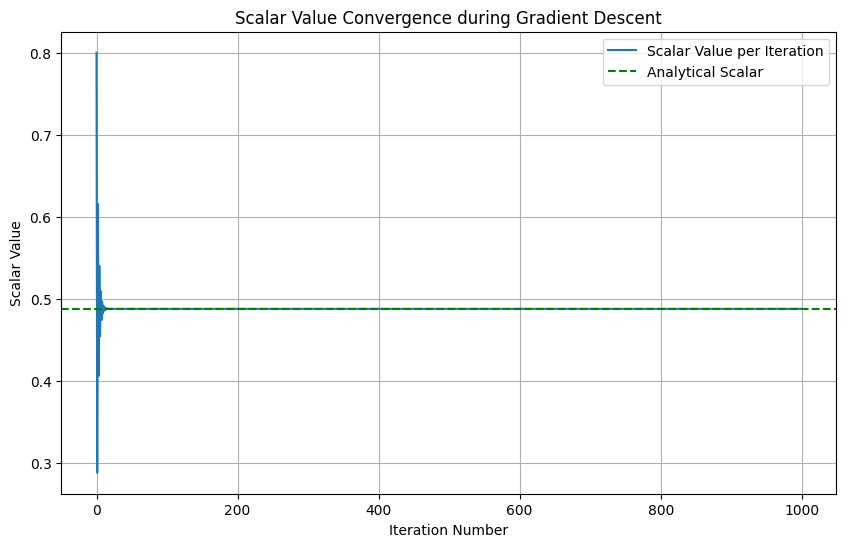

In [ ]:
# Extract the scalar values from the projections history
scalar_history = [np.dot(proj, vector_b) / np.dot(vector_b, vector_b) for proj in projections_history]

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), scalar_history, label='Scalar Value per Iteration')
plt.axhline(y=scalar_projection, color='g', linestyle='--', label='Analytical Scalar')
plt.xlabel('Iteration Number')
plt.ylabel('Scalar Value')
plt.title('Scalar Value Convergence during Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()